# GOT Classification Model
 DAT-5303 | Machine Learning |
 By Marius Heje Mæhle |
 Hult International Business School


In [1]:
# importing the necessary libraries
import pandas            as pd                       # data science essentials
import numpy             as np                       # mathematical essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# specifying file name
file = './__datasets/GOT_character_predictions.xlsx'

# reading the file into Python
got = pd.read_excel(io = file)

# outputting the first ten rows of the dataset to check the data
got.head(n = 10)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0
5,6,Grazdan mo Ullhor,Good Master,1,Astapori,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.030100,0
6,7,Cleon,King of Astapor,1,Astapori,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,NaN,NaN,NaN,NaN,NaN,0.103679,0
7,8,Ghael,Lord,1,Astapori,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,0.023411,1
8,9,Grazdan,Good Master,1,Astapori,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.013378,0
9,10,Moonshadow,NaN,0,Braavos,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,50.0,0.010033,1


In [2]:
# INFOrmation about each variable
got.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1836 non-null   int64  
 1   name                        1836 non-null   object 
 2   title                       880 non-null    object 
 3   male                        1836 non-null   int64  
 4   culture                     627 non-null    object 
 5   dateOfBirth                 391 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1422 non-null   object 
 10  spouse                      256 non-null    object 
 11  book1_A_Game_Of_Thrones     1836 non-null   int64  
 12  book2_A_Clash_Of_Kings      1836 non-null   int64  
 13  book3_A_Storm_Of_Swords     1836 

# User-Defined Functions
-  instantiate some useful user-defined functions

In [3]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

# Missing Values Detection

In [4]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
dtype: int64

In [5]:
# Getting descriptive statistics for numeric data and rounding to two decimals
got.describe(include = 'number').round(2)

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.00,1836.00,391.00,1836.00,1836.00,1836.00,1836.00,1836.00,21.00,26.00,23.00,256.00,410.00,1836.00,1836.00
mean,918.50,0.61,1717.91,0.19,0.58,0.47,0.37,0.38,0.71,0.19,0.65,0.77,-1368.04,0.08,0.73
std,530.15,0.49,20587.05,0.39,0.49,0.50,0.48,0.48,0.46,0.40,0.49,0.42,20104.31,0.15,0.44
min,1.00,0.00,-28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00
25%,459.75,0.00,237.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.01,0.00
50%,918.50,1.00,267.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,27.00,0.03,1.00
75%,1377.25,1.00,285.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,49.75,0.08,1.00
max,1836.00,1.00,298299.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,1.00,1.00


In [6]:
#the mean age is in minus so checking if there are any mistakes in the dataset

In [7]:
#printing to check if th values below 0
print(got["name"][got["age"] < 0])
print(got['age'][got['age'] < 0])

443    Addam Velaryon
748          Polliver
Name: name, dtype: object
443   -298001.0
748   -277980.0
Name: age, dtype: float64


In [8]:
#Two people with wrong values. Not allowed to edit them so maybe not use age

# Flagging Missing Values 

In [9]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age'], dtype='object')

In [10]:
#Develop missing value and categorical encoding strategies

#title                956  - (categorical) one-hot encode, drop original
#culture              1209 - (categorical) one-hot encode, drop original
#dateOfBirth          1445 - (continuous) impute - median
#mother               1815 - (categorical) dirty, one-hot encode, drop original
#father               1810 - (categorical) dirty, one-hot encode, drop original
#heir                 1813 - (categorical) dirty, one-hot encode, drop original
#house                414  - (categorical) one-hot encode, drop original
#spouse               1580 - (categorical) dirty, one-hot encode, drop original
#isAliveFather        1815 - (discrete) dirty, feature out, drop original
#isAliveMother        1810 - (discrete) dirty, feature out, drop original
#isAliveSpouse        1813 - (discrete) dirty, feature out, drop original
#isAliveHeir          1580 - (discrete) dirty, feature out, drop original
#age                  1426 - (continuous) impute  median

In [11]:
# dropping the variables with too many missing variables
got = got.drop('mother', axis = 1)
got = got.drop('father', axis = 1)
got = got.drop('heir', axis = 1)
got = got.drop('spouse', axis = 1)
got = got.drop('isAliveFather', axis = 1)
got = got.drop('isAliveMother', axis = 1)
got = got.drop('isAliveSpouse', axis = 1)
got = got.drop('isAliveHeir', axis = 1)

In [12]:
# Fill the nans we can with median
got["age"].fillna(got["age"].median(), inplace=True)
got["age"].fillna(got["dateOfBirth"].median(), inplace=True)

# Some nans values are nan because we dont know them so just fill them with -1
got.fillna(value=-1, inplace=True)

In [13]:
#Fill the 'NaN' values in the Dataset for the cat. variables with unknown
cat_fill =['title', 'culture','house']

for col in got[cat_fill]:
    if got[col].isnull().astype(int).sum() > 0:
        got[col] = got[col].fillna('unknown')

In [14]:
#Check the data on culture because it looks like there are more values for more then one culture. 
got['culture'].value_counts()

-1                         1209
Northmen                    118
Ironborn                    105
Free Folk                    50
Valyrian                     43
Braavosi                     41
Dornish                      21
Dothraki                     21
Ghiscari                     21
Rivermen                     16
Valemen                      16
Reach                        15
Vale mountain clans          14
Westeros                     12
Dornishmen                   11
Free folk                    10
Westerman                     9
northmen                      9
Tyroshi                       7
Stormlands                    6
Northern mountain clans       5
Qartheen                      5
Astapori                      4
Summer Isles                  4
Westermen                     4
Ironmen                       4
Meereenese                    3
First Men                     3
Lysene                        3
Pentoshi                      3
Crannogmen                    3
Wildling

In [15]:
# fixing typos for predominant cultures
got["culture"] = got["culture"].replace(["northmen"], "Northmen")
got["culture"] = got["culture"].replace(["ironborn"], "Ironborn")
got["culture"] = got["culture"].replace(["Free folk"], "Free Folk")
got["culture"] = got["culture"].replace(["Summer Islands"], "summer islands")

# checking values for culture
got['culture'].value_counts()

-1                         1209
Northmen                    127
Ironborn                    106
Free Folk                    60
Valyrian                     43
Braavosi                     41
Ghiscari                     21
Dornish                      21
Dothraki                     21
Rivermen                     16
Valemen                      16
Reach                        15
Vale mountain clans          14
Westeros                     12
Dornishmen                   11
Westerman                     9
Tyroshi                       7
Stormlands                    6
Qartheen                      5
Northern mountain clans       5
Astapori                      4
Ironmen                       4
Summer Isles                  4
Westermen                     4
First Men                     3
Crannogmen                    3
Lysene                        3
Meereenese                    3
Pentoshi                      3
Westerlands                   2
Wildlings                     2
Sisterme

In [16]:
#checking for missing values after cleaning the data
got.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
male                          0
culture                       0
dateOfBirth                   0
house                         0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
age                           0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house                       0
m_spouse                      0
m_isAliveFather               0
m_isAliveMother               0
m_isAliveSpouse               0
m_isAliveHeir                 0
m_age                         0
dtype: int64

# CART Models 

In [17]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# Logistic Regression

In [18]:
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
m_dateOfBirth                 0.17
m_mother                      0.14
m_isAliveFather               0.14
m_heir                        0.13
m_isAliveSpouse               0.13
m_father                      0.13
m_isAliveMother               0.13
m_spouse                      0.06
m_isAliveHeir                 0.06
m_culture                     0.05
m_title                       0.05
m_house                       0.05
age                           0.05
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
m_age                        -0.03
dateOfBirth                  -0.06
book4_A_Feast_For_Crows      -0.08
S.No                         -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

In [19]:
#Stratifying the Response Variable
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

In [20]:
#Preparing Explanatory and Response Data

# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)

# declaring response variable
got_target = got.loc[ : , 'isAlive']

In [21]:
# Prepare train-test split for statsmodels

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target, #y data
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [22]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



# Univariate Logistic Regression Model
- Building a logistic regression model in statsmodels using the explanatory variable that is most highly correlated and relevant with the response variable.

In [23]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = "isAlive ~ popularity",
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.564981
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.030     
Dependent Variable: isAlive          AIC:              1870.6965 
Date:               2022-03-29 16:04 BIC:              1881.5160 
No. Observations:   1652             Log-Likelihood:   -933.35   
Df Model:           1                LL-Null:          -962.51   
Df Residuals:       1650             LLR p-value:      2.2294e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      1.2405    0.0659  18.8165  0.0000   1.1113   1.3697
popularity    -2.6995    0.3758  -7.1830  0.0000  -3.4361  -1.9629
=================================================================

"""

# Build a logistic regression model in statsmodels using all of the explanatory variables.

In [24]:
for val in got_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 male + 
 culture + 
 dateOfBirth + 
 house + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 age + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveFather + 
 m_isAliveMother + 
 m_isAliveSpouse + 
 m_isAliveHeir + 
 m_age + 


In [25]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula   = """ isAlive ~
                                         male +
                                         dateOfBirth + 
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         book4_A_Feast_For_Crows +    
                                         popularity """,  
                                         data = got_train)


# FITTING the model object
results_logistic = logistic_full.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.500212
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.141     
Dependent Variable:   isAlive            AIC:                1668.7014 
Date:                 2022-03-29 16:04   BIC:                1711.9793 
No. Observations:     1652               Log-Likelihood:     -826.35   
Df Model:             7                  LL-Null:            -962.51   
Df Residuals:         1644               LLR p-value:        4.8904e-55
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.2080   0.1273  9.4901 0.0000  0.9585  1.4575
male                    -0.6533   0.1318 -4.9557 0.0000 -0.9116 -0.3949
dateOfBirth             -0.0017   0.0006 -2.7740 0.0055 -0.0030 -0.0005
book1_A_Game_Of_Thrones -0.5675   0.1575 -3.6033 0.0003 -0.8762 -0.2588
book2_A_Clash_Of_Kings   1.6888   0.1446 11.6768 0.0000  1.4053  1.9723
book3_A_Storm_Of_Swords -0.3132   0.1456 -2.1518 0.0314 -0.5985 -0.0279
book4_A_Feast_For_Crows -0.1840   0.1436 -1.2810 0.2002 -0.4655  0.0975
popularity              -2.1480   0.4249 -5.0548 0.0000 -2.9808 -1.3151
=======================================================================

"""

# Logistic Regression in scikit-learn


In [26]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['male', 'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                    'book4_A_Feast_For_Crows', 'popularity'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book2_A_Clash_Of_Kings'],
}

In [27]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7512
LogReg Testing  ACCURACY: 0.7935
LogReg Train-Test Gap   : 0.0423


# The Confusion Matrix


In [28]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 18  32]
 [  6 128]]


In [29]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 6
True Positives : 128



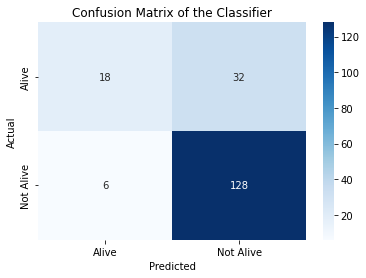

In [30]:
#Visualized Confusion Matrix
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

# AUC

In [31]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6576


In [32]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 1.17)
('book2_A_Clash_Of_Kings', -0.62)


# Classification Trees (CART Models)

In [33]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [34]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8916
Full Tree Testing ACCURACY : 0.7283
Full Tree AUC Score: 0.6003


In [35]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 16
True Positives : 118



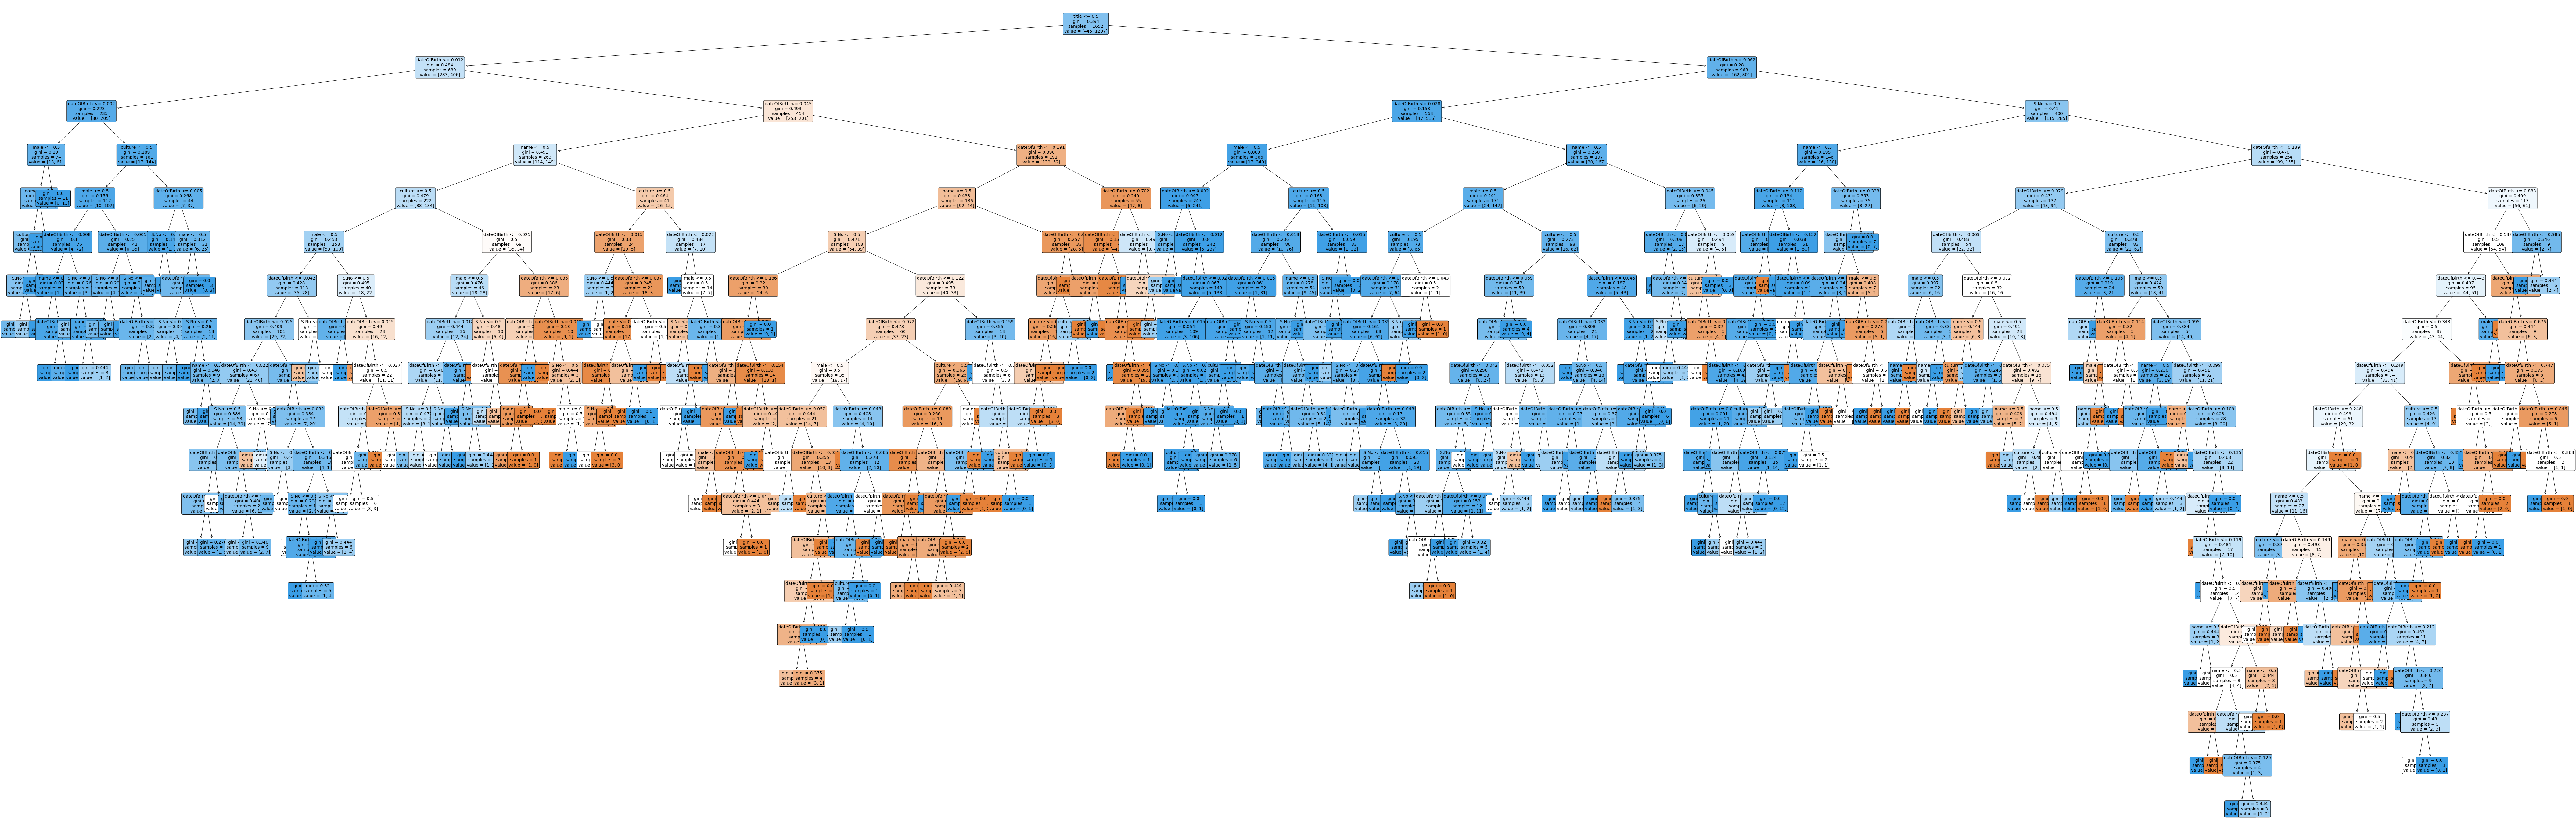

In [36]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [37]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 4,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.79
Testing  ACCURACY: 0.7663
AUC Score        : 0.6327


In [38]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 10
True Positives : 124



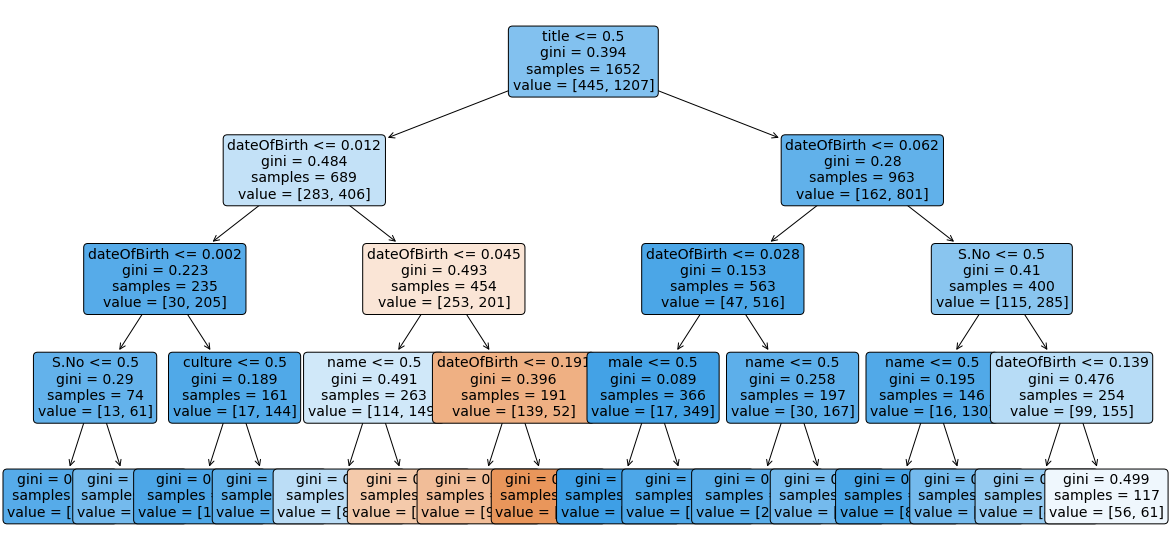

In [39]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

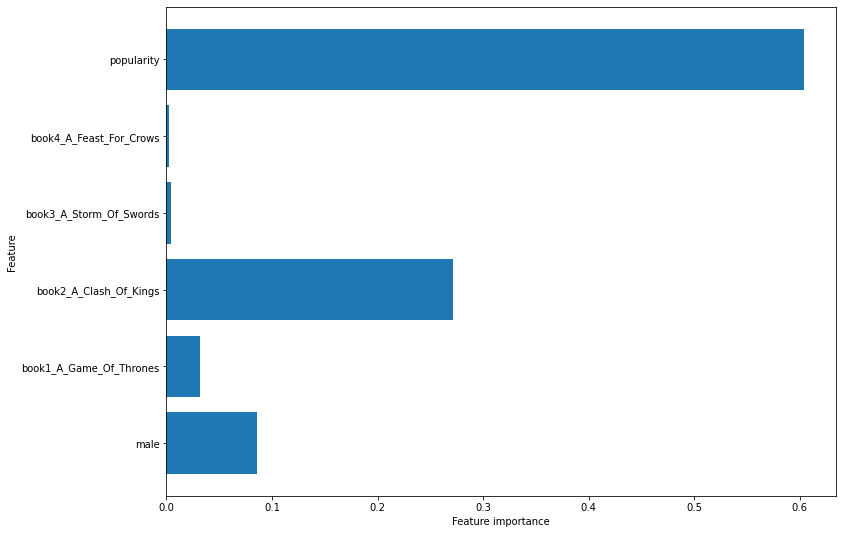

In [40]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

In [41]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6576         (18, 32, 6, 128)
Full Tree     0.6003           (16, 34, 16, 118)
Pruned Tree   0.6327         (17, 33, 10, 124)



# Classification Modeling with KNN

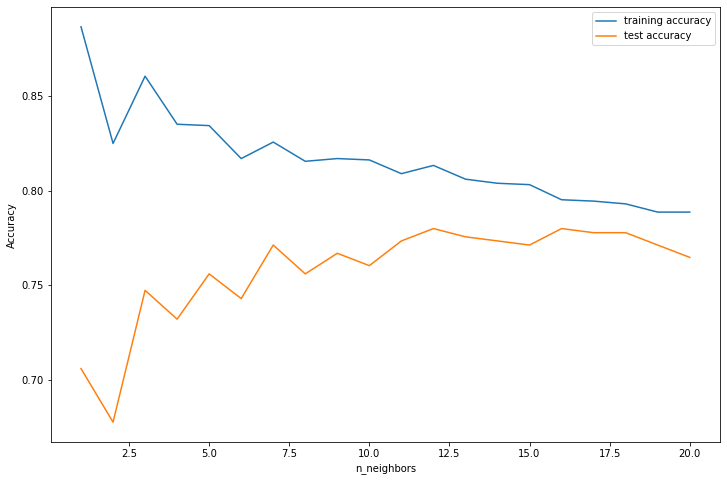

The optimal number of neighbors is: 12


In [42]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [43]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8123
Testing  ACCURACY: 0.7609
AUC Score        : 0.6603


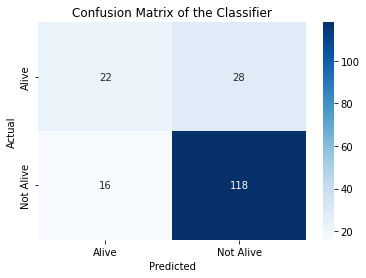

In [44]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Alive', 'Not Alive'])

In [45]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 10
True Positives : 124



In [46]:
## checking previous model performances
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6576,0.7512,0.7935,"(18, 32, 6, 128)"
1,Full Tree,0.6003,0.8916,0.7283,"(16, 34, 16, 118)"
2,Pruned Tree,0.6327,0.7900,0.7663,"(17, 33, 10, 124)"


# Hyperparameter Tuning


In [47]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [48]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7512
Testing  ACCURACY: 0.7935
AUC Score        : 0.6576


# Hyperparameter Tuning with RandomizedSearchCV

In [49]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 4.8}
Tuned CV AUC      : 0.562


In [50]:
# checking the results of RandomizedSearch CV
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.00558257, 0.00944328, 0.00605202, 0.00603191, 0.00557272,
        0.00946101, 0.00489926, 0.00513879, 0.00560427, 0.00551081,
        0.00602388, 0.00955908, 0.00633876, 0.00588195, 0.01092966,
        0.00453003, 0.00632922, 0.01007001, 0.00484006, 0.00921329,
        0.00625896, 0.00630673, 0.00974743, 0.00519602, 0.00983262,
        0.00500512, 0.00504692, 0.00599035, 0.00478156, 0.00958236,
        0.00489306, 0.00717672, 0.01003639, 0.00993196, 0.02674834,
        0.01232815, 0.01245451, 0.01214266, 0.00544262, 0.00681957,
        0.009902  , 0.00720692, 0.00441806, 0.00552543, 0.0104444 ,
        0.00958792, 0.0071284 , 0.00670894, 0.00608706, 0.00643937,
        0.00605941, 0.00499797, 0.00480278, 0.00540797, 0.01002407,
        0.00587821, 0.00652305, 0.00602762, 0.00982761, 0.01057974,
        0.01082182, 0.00569669, 0.00459242, 0.00666245, 0.00557081,
        0.00991837, 0.00660125, 0.00475812, 0.00715566, 0.0063084 ,
        0.00671999, 0.00881529,

In [51]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=4.8, max_iter=1000, random_state=219)

In [52]:
# building a model based on hyperparameter tuning results
#LogisticRegression(C=4.8, max_iter=1000, random_state=219)

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C=4.8,
                              solver= 'sag',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7542
LR Tuned Testing  ACCURACY: 0.7989
LR Tuned AUC Score        : 0.6739


In [53]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 7
True Positives : 127



In [54]:
# loading model performance
model_performance = pd.read_excel('./__results/classification_model_performance.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

/var/folders/b6/gft1y3816rb144ndkttw62jh0000gn/T/ipykernel_35368/1988116072.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append(


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6576,0.7512,0.7935,"(18, 32, 6, 128)"
1,Full Tree,0.6003,0.8916,0.7283,"(16, 34, 16, 118)"
2,Pruned Tree,0.6327,0.7900,0.7663,"(17, 33, 10, 124)"
3,Tuned LR,0.6739,0.7542,0.7989,"(20, 30, 7, 127)"


In [55]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}
Tuned Training AUC: 0.6705


In [56]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 3,
                                    max_depth        = 4,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7778
Testing  ACCURACY: 0.7772
AUC Score        : 0.6276


In [57]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 15
False Positives: 35
False Negatives: 6
True Positives : 128



In [58]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

/var/folders/b6/gft1y3816rb144ndkttw62jh0000gn/T/ipykernel_35368/2804147665.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append(


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6576,0.7512,0.7935,"(18, 32, 6, 128)"
1,Full Tree,0.6003,0.8916,0.7283,"(16, 34, 16, 118)"
2,Pruned Tree,0.6327,0.7900,0.7663,"(17, 33, 10, 124)"
3,Tuned LR,0.6739,0.7542,0.7989,"(20, 30, 7, 127)"
4,Tuned Tree,0.6276,0.7778,0.7772,"(15, 35, 6, 128)"


In [59]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [60]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8916
Testing  ACCURACY: 0.7228
AUC Score        : 0.584


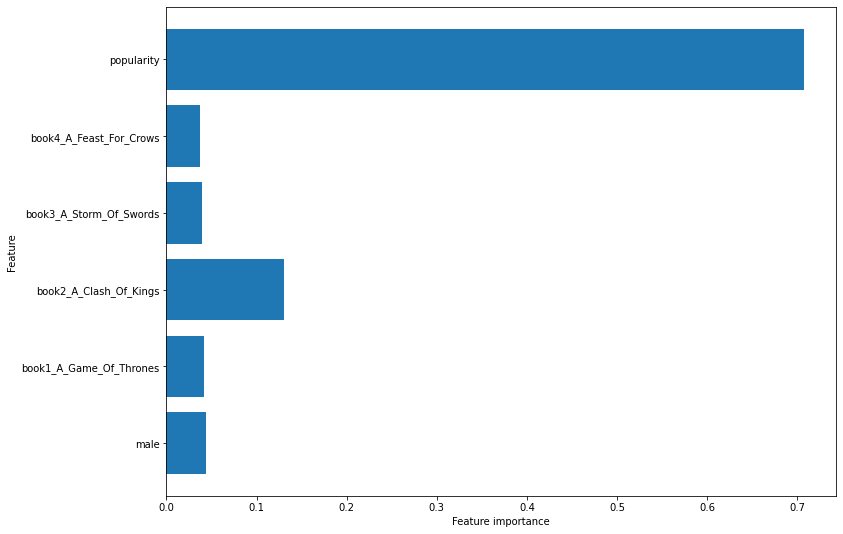

In [61]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [62]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 15
True Positives : 119



In [63]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

/var/folders/b6/gft1y3816rb144ndkttw62jh0000gn/T/ipykernel_35368/4080335602.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append(


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6576,0.7512,0.7935,"(18, 32, 6, 128)"
1,Full Tree,0.6003,0.8916,0.7283,"(16, 34, 16, 118)"
2,Pruned Tree,0.6327,0.7900,0.7663,"(17, 33, 10, 124)"
3,Tuned LR,0.6739,0.7542,0.7989,"(20, 30, 7, 127)"
4,Tuned Tree,0.6276,0.7778,0.7772,"(15, 35, 6, 128)"
5,Random Forest (Full),0.5840,0.8916,0.7228,"(14, 36, 15, 119)"


In [64]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Users/mariushejemaehle/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 11, 'criterion': 'entropy', 'bootstrap': False}
Tuned Training AUC: 0.6446


In [65]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_leaf=11, n_estimators=350, random_state=219,
                       warm_start=True)

In [66]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 11,
                                      n_estimators     = 350,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8202
Forest Tuned Testing  ACCURACY: 0.8043
Forest Tuned AUC Score        : 0.6964


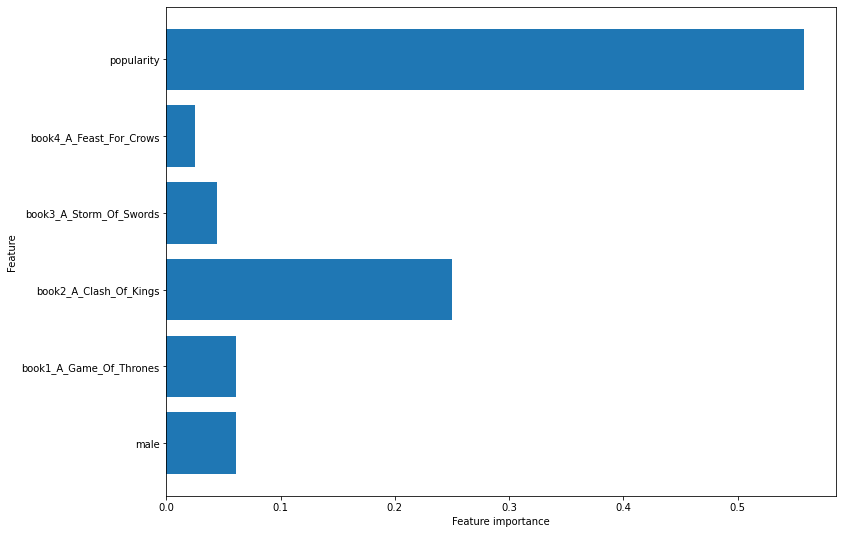

In [67]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [68]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 9
True Positives : 125



In [69]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

/var/folders/b6/gft1y3816rb144ndkttw62jh0000gn/T/ipykernel_35368/3042004506.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append(


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6576,0.7512,0.7935,"(18, 32, 6, 128)"
1,Full Tree,0.6003,0.8916,0.7283,"(16, 34, 16, 118)"
2,Pruned Tree,0.6327,0.7900,0.7663,"(17, 33, 10, 124)"
3,Tuned LR,0.6739,0.7542,0.7989,"(20, 30, 7, 127)"
4,Tuned Tree,0.6276,0.7778,0.7772,"(15, 35, 6, 128)"
5,Random Forest (Full),0.5840,0.8916,0.7228,"(14, 36, 15, 119)"
6,Tuned Random Forest (Full),0.6964,0.8202,0.8043,"(23, 27, 9, 125)"


# Gradient Boosted Machines (GBM)


In [70]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8117
Testing ACCURACY : 0.7391
AUC Score        : 0.6015


In [71]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 15
False Positives: 35
False Negatives: 13
True Positives : 121



In [72]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

/var/folders/b6/gft1y3816rb144ndkttw62jh0000gn/T/ipykernel_35368/2517585896.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append(


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6576,0.7512,0.7935,"(18, 32, 6, 128)"
1,Full Tree,0.6003,0.8916,0.7283,"(16, 34, 16, 118)"
2,Pruned Tree,0.6327,0.7900,0.7663,"(17, 33, 10, 124)"
3,Tuned LR,0.6739,0.7542,0.7989,"(20, 30, 7, 127)"
4,Tuned Tree,0.6276,0.7778,0.7772,"(15, 35, 6, 128)"
5,Random Forest (Full),0.5840,0.8916,0.7228,"(14, 36, 15, 119)"
6,Tuned Random Forest (Full),0.6964,0.8202,0.8043,"(23, 27, 9, 125)"
7,GBM (Full),0.6015,0.8117,0.7391,"(15, 35, 13, 121)"


FINAL MODEL: Tuned Random Forest (Full)